## 1. ACCESSING DATA

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt


#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('hr_raw_data_v0.csv', index_col=0)

In [3]:
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,NaN,5,6,"14307,50$",1976,"171690,00$",NaN,NaN,False
4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,"12783,92$",1977,NaN,NaN,NaN,0


## 2. STRUCTURAL DEFINITION AND STRUCTURAL CLEANING

### 2.1 STRUCTURAL DEFINITION

In [ ]:
#COLUMN RENAMES:

title_mapping = {"employeenumber": "employee_number",
                "gender": "gender",
                "datebirth": "birth_year",
                "age": "age",
                "maritalstatus": "marital_status",
                "jobrole": "job_title",
                "department": "department",
                "attrition": "terminated",
                "standardhours": "standard_hours",
                "monthlyincome": "monthly_income",
                "remotework": "remote",
                "businesstravel": "business_travel",
                "dailyrate": "daily_rate",
                "distancefromhome": "dist_home",
                "educationfield": "education_field",
                "education": "education_scale",
                "environmentsatisfaction": "env_sat_rate",
                "hourlyrate": "hourly_rate",
                "jobinvolvement": "job_involvement",
                "joblevel": "job_level",
                "jobsatisfaction": "job_sat_rate",
                "monthlyrate": "monthly_rate",
                "numcompaniesworked": "num_comp_worked",
                "overtime": "over_time",
                "percentsalaryhike": "perc_salary_hike",
                "performancerating": "perf_rate",
                "relationshipsatisfaction": "relationship_sat_rate",
                "stockoptionlevel": "stock_opt_level",
                "totalworkingyears": "tot_working_year",
                "trainingtimeslastyear": "traning_times_last_year",
                "worklifebalance": "work_life_balance",
                "yearsatcompany": "year_at_comp",
                "yearsincurrentrole": "year_current_role",
                "yearssincelastpromotion": "year_last_promotion",
                "yearswithcurrmanager": "year_current_mngr",
                "salary": "annual_salary",
                "roledepartament": "role_department"}

#CATEGORIES: 

columns_personal =      ['employee_number', 
                        'gender', 
                        'birth_year', 
                        'age', 
                        'marital_status',
                        'dist_home']

columns_job =           ['job_title',
                        'department',
                        'terminated',
                        'year_at_comp',
                        'year_current_role',
                        'standard_hours',
                        'remote',
                        'business_travel',
                        'over_time', 
                        'job_level', 
                        'stock_opt_level', 
                        'traning_times_last_year', 
                        'perf_rate',
                        'year_last_promotion',
                        'year_current_mngr']

columns_education =     ['education_field',
                        'education_scale']


columns_income =        ['annual_salary',
                        'monthly_income',
                        'daily_rate',
                        'hourly_rate',
                        'monthly_rate',
                        'perc_salary_hike']

columns_satisfaction =  ['env_sat_rate',
                        'job_involvement',
                        'job_sat_rate',
                        'relationship_sat_rate',
                        'work_life_balance']

columns_emp_bgd =       ['num_comp_worked',
                        'tot_working_year']


#COLUMNS TO DROP 

drop_colums = ['year_current_role', 'roledepartmet', 'sameasmonthlyincome','numberchildren', 'hourly_rate']





### 2.2 STRUCTURAL CLEANING

- Renaming columns as per dictionary
- Reordering columns as per new names

In [5]:
# COLUMN RENAME
df = df.rename(columns={k: v for k, v in title_mapping.items() if k in df.columns}) 


In [6]:
# COLUMN REORDER

new_order_columns = columns_personal+columns_job+columns_education+columns_income+columns_satisfaction+columns_emp_bgd

def reorder_columns(df, list_columns):

    #Reorder columns as per provided list, add all the missing ones at the end.
    
    try:
        df = df[new_order_columns]
        extra_columns = [col for col in df.columns if col not in new_order_columns]
        df = df[ new_order_columns + extra_columns ]
    
    except KeyError as e:
        print(f"KeyError: {e}")
        missing_columns = [col for col in new_order_columns if col not in df.columns]
        print(f"Missing columns: {missing_columns}")

        extra_columns = [col for col in df.columns if col not in new_order_columns]
        df = df[ new_order_columns + extra_columns ]
    
    return df


In [7]:
df = reorder_columns(df, new_order_columns)

In [8]:
#ELIMINAR DUPLICADOS, NOS QUEDAMOS CON EL PRIMERO
df[df.duplicated(subset='employee_number', keep='first')].sort_values('employee_number')

,employee_number,gender,birth_year,age,marital_status,dist_home,job_title,department,terminated,year_at_comp,year_current_role,standard_hours,remote,business_travel,over_time,job_level,stock_opt_level,traning_times_last_year,perf_rate,year_last_promotion,year_current_mngr,education_field,education_scale,annual_salary,monthly_income,daily_rate,hourly_rate,monthly_rate,perc_salary_hike,env_sat_rate,job_involvement,job_sat_rate,relationship_sat_rate,work_life_balance,num_comp_worked,tot_working_year
1656,9,1,1982,41,Married,2,mANAGEr,NaN,No,18,NaN,Full Time,True,NaN,No,4,1,2,"3,0",11,8,NaN,5,"165950,00$","13829,17$",1712.182540,NaN,"35955,83$",16,2,3,1,2,"3,0",7,"22,0"
1652,61,0,1987,36,Single,5,lAboratORy TeChNiCiaN,NaN,No,13,NaN,Full Time,1,NaN,No,2,0,3,"3,0",3,7,NaN,2,"59140,00$","4928,33$",610.174603,NaN,"12813,67$",16,4,3,2,4,"4,0",8,"16,0"
1676,76,1,1976,47,Divorced,4,maNufACTURING DIREctOr,NaN,No,22,NaN,Part Time,Yes,travel_rarely,Yes,3,1,4,NaN,14,10,Life Sciences,3,"100071,84$","8339,32$",1032.487286,NaN,"21682,23$",12,3,2,2,3,"3,0",8,NaN
1649,108,1,1994,29,Divorced,21,maNufaCturing direcTOr,NaN,No,10,NaN,NaN,0,travel_rarely,No,3,1,1,"3,0",8,8,Life Sciences,4,NaN,"8339,32$",1032.487286,NaN,"21682,23$",11,2,4,1,3,"3,0",1,"10,0"
1616,112,1,1993,30,NaN,5,SalES ExeCuTIVe,NaN,No,10,NaN,Part Time,True,travel_rarely,No,3,1,2,"3,0",7,4,NaN,3,"100071,84$","8339,32$",1032.487286,129.060911,"21682,23$",12,2,3,4,3,"3,0",2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,1532,0,1989,34,NaN,-37,SalES exEcutIve,NaN,Yes,5,NaN,NaN,1,non-travel,Yes,2,0,3,"3,0",0,4,Marketing,3,NaN,"4420,00$",547.238095,NaN,"11492,00$",13,1,4,4,2,"2,0",8,NaN
1637,1567,0,1988,35,NaN,16,HEalTHCArE rEpresEnTaTIvE,NaN,No,8,NaN,Part Time,1,travel_rarely,Yes,3,0,2,"3,0",0,0,Life Sciences,3,"100071,84$",NaN,1032.487286,NaN,"21682,23$",12,4,3,3,3,"3,0",4,"10,0"
1638,1568,1,1975,48,Married,2,sALES EXEcuTIVe,NaN,No,9,NaN,Part Time,True,travel_rarely,No,2,1,2,"3,0",6,7,NaN,5,"40510,00$","3375,83$",417.960317,NaN,"8777,17$",14,2,3,4,1,"3,0",2,"14,0"
1657,1569,0,1978,45,NaN,2,sAles executiVe,NaN,No,8,NaN,Part Time,False,travel_rarely,No,2,1,3,"3,0",3,7,Other,3,"48050,00$",NaN,495.753968,NaN,"10410,83$",19,4,3,2,2,"4,0",0,NaN


In [9]:
df.head(1)

,employee_number,gender,birth_year,age,marital_status,dist_home,job_title,department,terminated,year_at_comp,year_current_role,standard_hours,remote,business_travel,over_time,job_level,stock_opt_level,traning_times_last_year,perf_rate,year_last_promotion,year_current_mngr,education_field,education_scale,annual_salary,monthly_income,daily_rate,hourly_rate,monthly_rate,perc_salary_hike,env_sat_rate,job_involvement,job_sat_rate,relationship_sat_rate,work_life_balance,num_comp_worked,tot_working_year
0,1,0,1972,51,NaN,6,resEArch DIREcToR,NaN,No,20,NaN,Full Time,Yes,NaN,No,5,0,5,"3,0",15,15,NaN,3,"195370,00$","16280,83$",2015.722222,NaN,"42330,17$",13,1,3,3,3,"3,0",7,NaN


## 3. DATA ANALYSYS

- Data analysis general
- Data analysis by category

### 3.1 GENERAL

In [10]:
# NULLS BY COLUMN (%)
df.isnull().sum() / df.shape[0] * 100

employee_number             0.000000
gender                      0.000000
birth_year                  0.000000
age                         0.000000
marital_status             40.226460
dist_home                   0.000000
job_title                   0.000000
department                 81.406436
terminated                  0.000000
year_at_comp                0.000000
year_current_role          97.914184
standard_hours             20.917759
remote                      0.000000
business_travel            47.735399
over_time                  41.477950
job_level                   0.000000
stock_opt_level             0.000000
traning_times_last_year     0.000000
perf_rate                  11.918951
year_last_promotion         0.000000
year_current_mngr           0.000000
education_field            46.126341
education_scale             0.000000
annual_salary              16.984505
monthly_income             29.141836
daily_rate                  0.000000
hourly_rate                75.506555
m

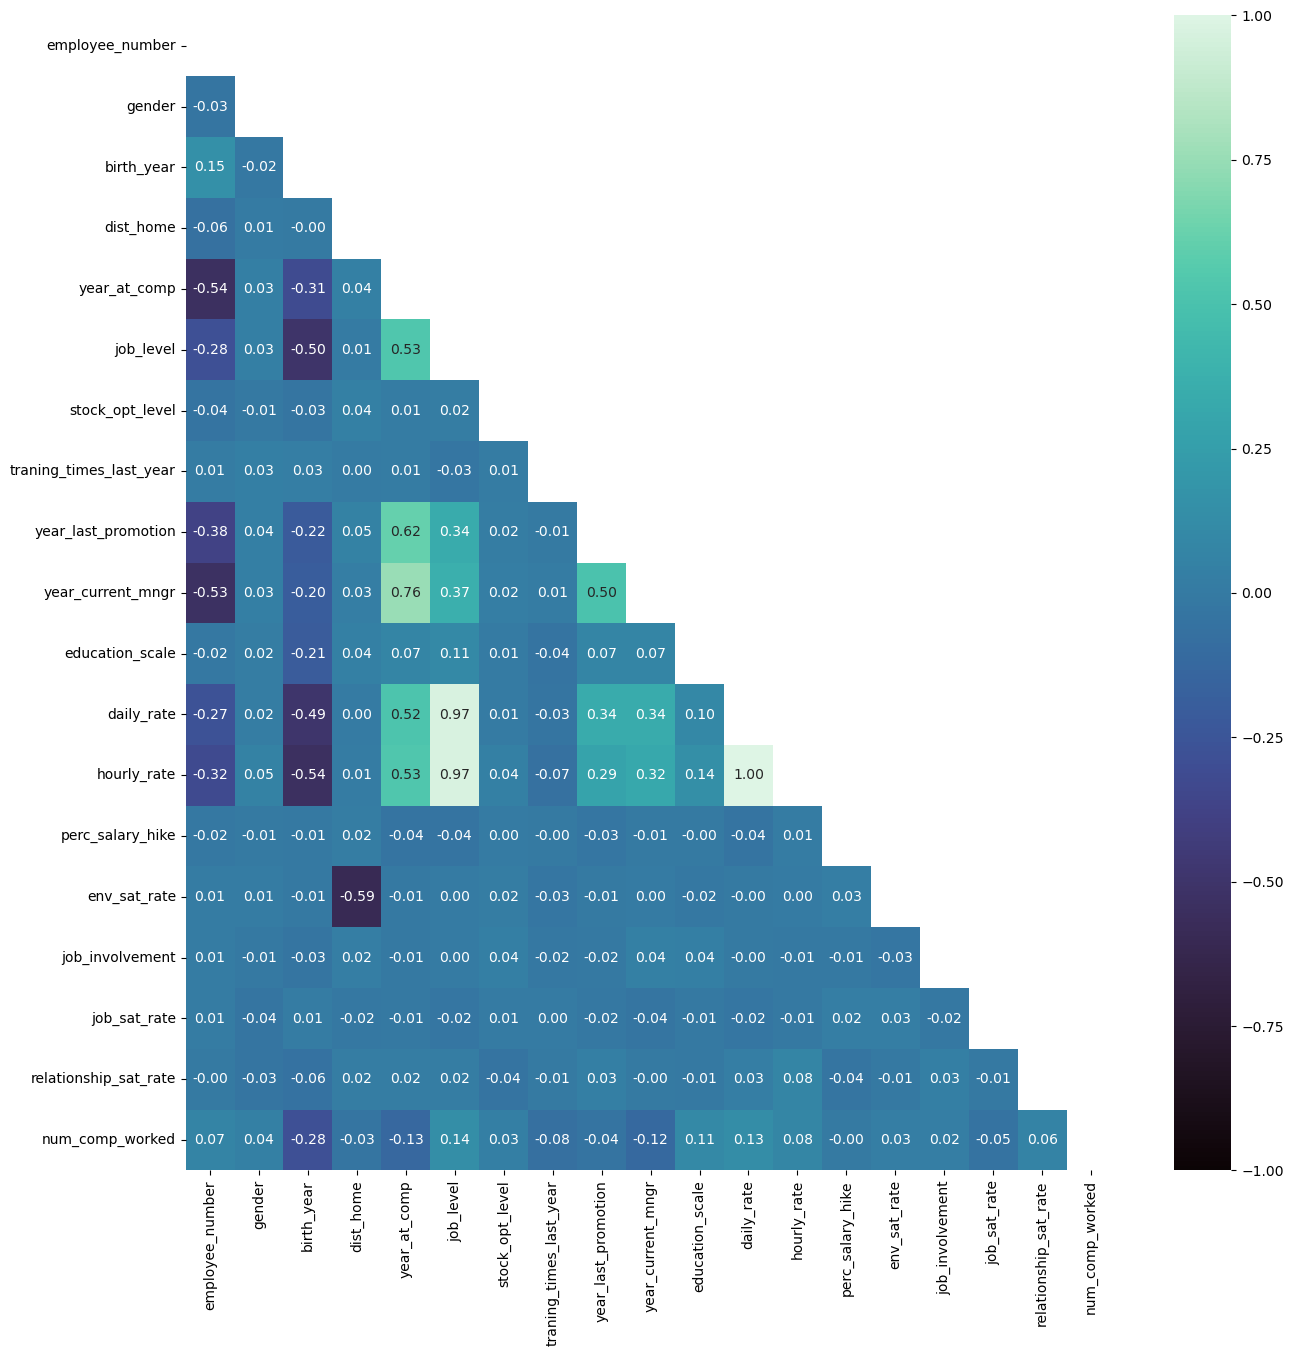

In [11]:
# GENERAL DATA ANALYSIS

numerics = df.select_dtypes(exclude = 'O').columns
df_corr = df[numerics].corr(method = 'pearson')


plt.figure(figsize = (15, 15))

mask = np.triu(np.ones_like(df_corr, dtype=bool))

sns.heatmap(df_corr, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 

In [12]:
# DATA ANALYSIS BY CATEGORY

def data_analysis (dataframe, columns):

    print('📌CATEGORY ANALYSIS:\n')
    display(df[columns].describe().T)
    print('\n')

    for col in columns:
        
        print(f'📌Columna: {col.upper()} \n')
        print('Null counter:', dataframe[col].isna().sum(), '\n')
        print('These are the unique values:', dataframe[col].unique(),'\n')
        print('These are values counter:', dataframe[col].value_counts(dropna=False),'\n')
        print('-------------')


#### 3.1.1 Personal Columns

In [13]:
data_analysis(df, columns_personal)

📌CATEGORY ANALYSIS:



,count,mean,std,min,25%,50%,75%,max
employee_number,1678.0,809.859952,467.084867,1.0,403.25,813.5,1215.75,1614.0
gender,1678.0,0.398689,0.489774,0.0,0.00,0.0,1.00,1.0
birth_year,1678.0,1986.047080,9.154908,1963.0,1980.00,1987.0,1993.00,2005.0
dist_home,1678.0,4.504172,14.652066,-49.0,2.00,5.0,11.00,29.0




📌Columna: EMPLOYEE_NUMBER 

Null counter: 0 

These are the unique values: [   1    2    3 ... 1612 1613 1614] 

These are values counter: employee_number
300     2
159     2
271     2
1158    2
191     2
       ..
547     1
546     1
545     1
544     1
1614    1
Name: count, Length: 1614, dtype: int64 

-------------
📌Columna: GENDER 

Null counter: 0 

These are the unique values: [0 1] 

These are values counter: gender
0    1009
1     669
Name: count, dtype: int64 

-------------
📌Columna: BIRTH_YEAR 

Null counter: 0 

These are the unique values: [1972 1971 1981 1976 1977 1975 1964 1982 1967 1985 1968 1983 1965 1988
 1978 1990 1987 1989 1970 1980 1963 1991 1986 1974 1984 1973 1979 1993
 1994 1992 1969 1966 1996 1995 1997 1998 1999 2000 2001 2002 2003 2004
 2005] 

These are values counter: birth_year
1992    89
1988    88
1989    86
1994    82
1987    80
1991    67
1993    66
1985    64
1990    63
1983    60
1986    56
1995    54
1996    54
1978    50
1981    50
1982    48
199

#### 3.1.2 Job Columns

In [14]:
data_analysis(df, columns_job)

📌CATEGORY ANALYSIS:



,count,mean,std,min,25%,50%,75%,max
year_at_comp,1678.0,7.124553,6.173837,0.0,3.0,5.0,9.0,40.0
job_level,1678.0,2.064362,1.099425,1.0,1.0,2.0,3.0,5.0
stock_opt_level,1678.0,0.787843,0.843252,0.0,0.0,1.0,1.0,3.0
traning_times_last_year,1678.0,2.795590,1.288657,0.0,2.0,3.0,3.0,6.0
year_last_promotion,1678.0,2.241955,3.246554,0.0,0.0,1.0,3.0,15.0
year_current_mngr,1678.0,4.200238,3.554224,0.0,2.0,3.0,7.0,17.0




📌Columna: JOB_TITLE 

Null counter: 0 

These are the unique values: [' resEArch DIREcToR ' ' ManAGeR ' ' ManaGER ' ... ' sAlES ExECUTivE '
 ' SaLes ExecUtIVe ' ' mAnUfactURInG DiRECTOr '] 

These are values counter: job_title
mANager                    5
ManagEr                    3
mAnageR                    3
maNaGeR                    3
MANAgER                    3
                          ..
RESeaRCh sCientIsT         1
reseARCH sCIEntiST         1
REseaRCh SCiENTIst         1
LabOrATory TEChNICiaN      1
mAnUfactURInG DiRECTOr     1
Name: count, Length: 1579, dtype: int64 

-------------
📌Columna: DEPARTMENT 

Null counter: 1366 

These are the unique values: [nan ' Research & Development ' ' Sales ' ' Human Resources '] 

These are values counter: department
NaN                         1366
 Research & Development      203
 Sales                        93
 Human Resources              16
Name: count, dtype: int64 

-------------
📌Columna: TERMINATED 

Null counter: 0 

These 

#### 3.1.3 Income Columns

In [15]:
data_analysis(df, columns_income)

📌CATEGORY ANALYSIS:



,count,mean,std,min,25%,50%,75%,max
daily_rate,1678.0,668.079714,470.787298,104.103175,290.035510,556.256661,971.956349,2063.388889
hourly_rate,411.0,83.140768,57.272101,13.012897,36.254439,69.532083,116.987103,255.963294
perc_salary_hike,1678.0,15.154350,3.649607,11.000000,12.000000,14.000000,18.000000,25.000000




📌Columna: ANNUAL_SALARY 

Null counter: 285 

These are the unique values: ['195370,00$' '199990,00$' '192320,00$' '171690,00$' nan '100071,84$'
 '53914,11$' '165950,00$' '199730,00$' '134020,00$' '132060,00$'
 '195450,00$' '180410,00$' '192460,00$' '107480,00$' '167520,00$'
 '62010,00$' '198450,00$' '40010,00$' '104470,00$' '191324,62$'
 '160640,00$' '32100,00$' '102660,00$' '104750,00$' '61620,00$'
 '47210,00$' '153407,07$' '28111,13$' '46150,00$' '169590,00$' '54060,00$'
 '59020,00$' '108550,00$' '59140,00$' '66460,00$' '139730,00$' '66870,00$'
 '47350,00$' '138720,00$' '190450,00$' '96130,00$' '115100,00$'
 '170460,00$' '36920,00$' '198470,00$' '23080,00$' '57470,00$'
 '104220,00$' '63470,00$' '23480,00$' '30720,00$' '124900,00$' '80200,00$'
 '170680,00$' '89430,00$' '192720,00$' '55770,00$' '26910,00$' '74030,00$'
 '88230,00$' '35790,00$' '177790,00$' '182130,00$' '135770,00$'
 '191900,00$' '171230,00$' '191870,00$' '79880,00$' '70830,00$'
 '34070,00$' '29290,00$' '120310,00$' '

#### 3.1.4 Education Columns

In [16]:
data_analysis(df,columns_education)

📌CATEGORY ANALYSIS:



,count,mean,std,min,25%,50%,75%,max
education_scale,1678.0,2.932658,1.02427,1.0,2.0,3.0,4.0,5.0




📌Columna: EDUCATION_FIELD 

Null counter: 774 

These are the unique values: [nan 'Life Sciences' 'Technical Degree' 'Medical' 'Other' 'Marketing'
 'Human Resources'] 

These are values counter: education_field
NaN                 774
Life Sciences       367
Medical             286
Marketing           106
Technical Degree     70
Other                63
Human Resources      12
Name: count, dtype: int64 

-------------
📌Columna: EDUCATION_SCALE 

Null counter: 0 

These are the unique values: [3 4 2 1 5] 

These are values counter: education_scale
3    649
4    461
2    322
1    186
5     60
Name: count, dtype: int64 

-------------


#### 3.1.4 Satisfaction Columns

In [17]:
data_analysis(df,columns_satisfaction)

📌CATEGORY ANALYSIS:



,count,mean,std,min,25%,50%,75%,max
env_sat_rate,1678.0,4.264005,6.912695,1.0,2.0,3.0,4.0,49.0
job_involvement,1678.0,2.740763,0.710359,1.0,2.0,3.0,3.0,4.0
job_sat_rate,1678.0,2.743147,1.105172,1.0,2.0,3.0,4.0,4.0
relationship_sat_rate,1678.0,2.700238,1.079494,1.0,2.0,3.0,4.0,4.0




📌Columna: ENV_SAT_RATE 

Null counter: 0 

These are the unique values: [ 1  3  4  2 42 37 35 25 27 31 39 21 15 14 33 19 12 13 28 47 36 29 24 46
 16 22 41 49 11 48 18 10 45 38 17 20 26 43] 

These are values counter: env_sat_rate
4     483
3     471
2     316
1     306
35      7
12      7
14      6
13      6
24      5
47      5
36      4
48      4
41      4
46      4
42      4
45      3
11      3
22      3
17      3
18      3
20      3
25      3
27      3
37      2
29      2
19      2
38      2
31      2
15      2
16      2
26      1
39      1
10      1
49      1
21      1
28      1
33      1
43      1
Name: count, dtype: int64 

-------------
📌Columna: JOB_INVOLVEMENT 

Null counter: 0 

These are the unique values: [3 2 4 1] 

These are values counter: job_involvement
3    995
2    421
4    170
1     92
Name: count, dtype: int64 

-------------
📌Columna: JOB_SAT_RATE 

Null counter: 0 

These are the unique values: [3 4 1 2] 

These are values counter: job_sat_rate
4    538
3    49

#### 3.1.5 Employement Background Columns

In [18]:
data_analysis(df, columns_emp_bgd)

📌CATEGORY ANALYSIS:



,count,mean,std,min,25%,50%,75%,max
num_comp_worked,1678.0,2.670441,2.501133,0.0,1.0,2.0,4.0,9.0




📌Columna: NUM_COMP_WORKED 

Null counter: 0 

These are the unique values: [7 0 1 3 2 4 8 9 5 6] 

These are values counter: num_comp_worked
1    597
0    234
3    174
4    166
2    163
7     88
6     75
5     67
9     59
8     55
Name: count, dtype: int64 

-------------
📌Columna: TOT_WORKING_YEAR 

Null counter: 549 

These are the unique values: [nan '34,0' '22,0' '28,0' '20,0' '21,0' '33,0' '40,0' '18,0' '25,0' '15,0'
 '17,0' '26,0' '16,0' '24,0' '14,0' '23,0' '27,0' '19,0' '11,0' '38,0'
 '37,0' '13,0' '12,0' '29,0' '10,0' '36,0' '35,0' '9,0' '31,0' '32,0'
 '8,0' '7,0' '30,0' '6,0' '5,0' '4,0' '3,0' '2,0' '1,0' '0,0'] 

These are values counter: tot_working_year
NaN     549
10,0    151
6,0      88
8,0      86
9,0      71
5,0      68
7,0      59
4,0      57
1,0      55
12,0     34
3,0      34
11,0     31
13,0     31
14,0     31
16,0     30
20,0     30
15,0     28
18,0     28
21,0     23
17,0     23
2,0      21
22,0     19
19,0     17
28,0     14
24,0     14
23,0     13
0,0       8

## 4. EXPORTING NEW DATA

In [19]:
df.to_csv("hr_raw_data_v1.csv", index=False)
